<a href="https://colab.research.google.com/github/salsabilaqonita/DigitalSkillFair38-Data-Science/blob/main/Final_Project_DSF_38_0_Titanic_Data_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic Sample Data Investigation**
######**Final Project – Digital Skill Fair 38.0 (Data Science)**
######***By: Salsabila Qonita Kaltsum***

In this project, I will be analyzing a sample dataset of Titanic passengers, consisting of 500 entries. The investigation will include the following steps:
1. Previewing the dataset using functions like head(), tail(), sample(), and info() to get a general overview.
2. Generating statistical summaries with describe() to extract key insights from the numerical data.
3. Checking for duplicate entries and determining how to handle them.
4. Identifying any missing values, calculating their proportions, and deciding on appropriate strategies to address them.

#**Data Source**
The dataset used in this project is a curated version known as `titanic3`, compiled by `Frank Harrell` and made available through hbiostat.org. This version includes corrections and enhancements to the original Titanic data.

🔗Frank Harrell's Hmisc Titanic Dataset: https://hbiostat.org/data/repo/titanic.html

🔗Excel version of the dataset: https://hbiostat.org/data/repo/titanic3.xls

#**Additional Notes**
As a historical reference, websites like Encyclopedia Titanica provide detailed information on over 2,000 Titanic passengers and crew members. Many curated datasets, including `titanic3`, incorporate portions of that historical data.

In [ ]:
!pip install graphviz

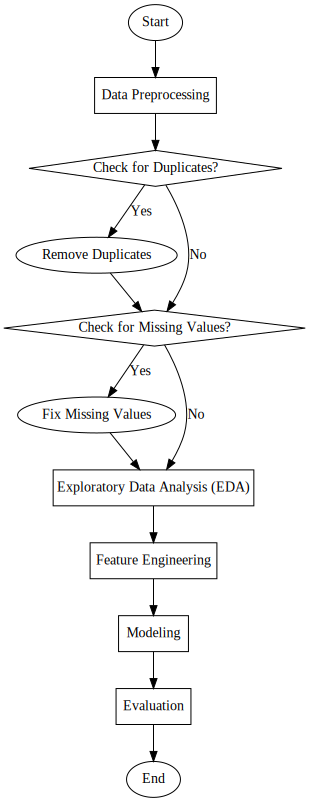

In [ ]:
from graphviz import Digraph

dot = Digraph()

# Main stages
dot.node('A', 'Start', shape='oval')
dot.node('B', 'Data Preprocessing', shape='box')
dot.node('C1', 'Check for Duplicates?', shape='diamond')
dot.node('C2', 'Remove Duplicates', shape='ellipse')
dot.node('D1', 'Check for Missing Values?', shape='diamond')
dot.node('D2', 'Fix Missing Values', shape='ellipse')
dot.node('E', 'Exploratory Data Analysis (EDA)', shape='box')
dot.node('F', 'Feature Engineering', shape='box')
dot.node('G', 'Modeling', shape='box')
dot.node('H', 'Evaluation', shape='box')
dot.node('Z', 'End', shape='oval')

# Flow
dot.edge('A', 'B')
dot.edge('B', 'C1')
dot.edge('C1', 'C2', label='Yes')
dot.edge('C1', 'D1', label='No')
dot.edge('C2', 'D1')
dot.edge('D1', 'D2', label='Yes')
dot.edge('D1', 'E', label='No')
dot.edge('D2', 'E')
dot.edge('E', 'F')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'Z')

# Render the flowchart in the notebook
dot.render('titanic_pipeline_flowchart', format='png', cleanup=False)
dot

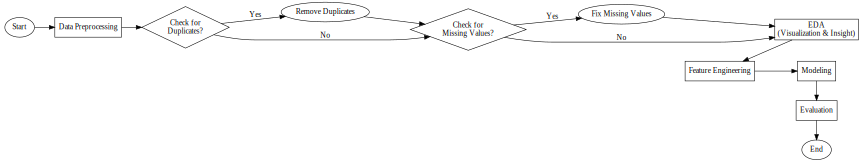

In [ ]:
from graphviz import Digraph

dot = Digraph(engine="dot", graph_attr={'rankdir': 'LR', 'size': '12,5'})

# Main nodes
dot.node('A', 'Start', shape='oval')
dot.node('B', 'Data Preprocessing', shape='box')
dot.node('C1', 'Check for\nDuplicates?', shape='diamond')
dot.node('C2', 'Remove Duplicates', shape='ellipse')
dot.node('D1', 'Check for\nMissing Values?', shape='diamond')
dot.node('D2', 'Fix Missing Values', shape='ellipse')
dot.node('E', 'EDA\n(Visualization & Insight)', shape='box')
dot.node('F', 'Feature Engineering', shape='box')
dot.node('G', 'Modeling', shape='box')
dot.node('H', 'Evaluation', shape='box')
dot.node('Z', 'End', shape='oval')

# Set same rank for top-level nodes (optional)
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('E')
    s.node('G')
    s.node('H')
    s.node('Z')

# Flow edges
dot.edge('A', 'B')
dot.edge('B', 'C1')
dot.edge('C1', 'C2', label='Yes', minlen='2')
dot.edge('C1', 'D1', label='No')
dot.edge('C2', 'D1', minlen='2')
dot.edge('D1', 'D2', label='Yes', minlen='2')
dot.edge('D1', 'E', label='No')
dot.edge('D2', 'E', minlen='2')
dot.edge('E', 'F', constraint='false')  # Allow vertical movement
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'Z')

# Render in notebook
dot.render('titanic_flow_vertical_step', format='png', cleanup=False)
dot


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

`numpy`: A library for numerical operations on arrays and matrices.

`pandas`: A library for data manipulation and analysis using DataFrame and Series structures.

`seaborn`: A statistical data visualization library built on top of matplotlib.

`matplotlib.pyplot`: A module for creating visualizations like charts and plots.

`pd.set_option()`: A method to configure Pandas display settings, here used to show all columns and rows of a DataFrame.

# Load Data

In [ ]:
# import data
df = pd.read_excel('titanic.xlsx')
data = df.copy()

In [ ]:
df

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000
5,1,"Anderson, Mr. Harry",male,48.0000
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000
7,0,"Andrews, Mr. Thomas Jr",male,39.0000
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000
9,0,"Artagaveytia, Mr. Ramon",male,71.0000


#  Preliminary

In [ ]:
# Showing top 5 rows of the data
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,survived,name,sex,age
222,0,"Ovies y Rodriguez, Mr. Servando",male,28.5
460,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0
16,0,"Baxter, Mr. Quigg Edmond",male,24.0
412,0,"Funk, Miss. Annie Clemmer",female,38.0
149,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0


Observations:
1. All columns are clearly labeled and appropriately typed
2. The `sex` column contains categorical values (male OR female)
3. The `age` column is numeric with decimal values
4. `survived` is apparently also binary (0,1)
5. No obvious defect on the data (column name vs its entries), all looks good

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observation:
1. Data contains 4 columns with 500 rows
2. Only the `age` column has missing values (49 missing entries), this will be handled later.
3. Most data types appear appropriate, but the `sex` column (currently object) will later be converted to numeric (e.g., 0 for female, 1 for male) for analysis purposes.

In [ ]:
# Convert the 'sex' column to 0 for female and 1 for male
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
data['sex'] = data['sex'].map({'female': 0, 'male': 1})

In [ ]:
# Check the result
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    int64  
 3   age       451 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
# Load your raw Titanic dataset
titanic_raw = pd.read_excel('titanic.xlsx')  # Replace with your actual file path

def preprocess_titanic_data(datatitanic):
    # Extract titles from the 'name' column
    datatitanic['title'] = datatitanic['name'].str.extract(r',\s*([^\.]*)\s*\.')

    # Common titles to encode
    common_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Major', 'Royal']
    for title in common_titles:
        datatitanic[f'title_{title}'] = (datatitanic['title'] == title).astype(int)

    # Convert 'sex' to binary (1 for male, 0 for female)
    datatitanic['sex_male'] = (datatitanic['sex'] == 'male').astype(int)

    # Categorize age into bins
    bins = [0, 4, 12, 18, 60, 100]
    labels = ['Toddler', 'Child', 'Teenager', 'Adult', 'Senior']
    datatitanic['age_category'] = pd.cut(datatitanic['age'], bins=bins, labels=labels)

    return datatitanic

# Run preprocessing
datatitanic = preprocess_titanic_data(titanic_raw)

# Check the result
datatitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      500 non-null    int64   
 1   name          500 non-null    object  
 2   sex           500 non-null    object  
 3   age           451 non-null    float64 
 4   title         500 non-null    object  
 5   title_Mr      500 non-null    int64   
 6   title_Miss    500 non-null    int64   
 7   title_Mrs     500 non-null    int64   
 8   title_Master  500 non-null    int64   
 9   title_Dr      500 non-null    int64   
 10  title_Rev     500 non-null    int64   
 11  title_Col     500 non-null    int64   
 12  title_Major   500 non-null    int64   
 13  title_Royal   500 non-null    int64   
 14  sex_male      500 non-null    int64   
 15  age_category  451 non-null    category
dtypes: category(1), float64(1), int64(11), object(3)
memory usage: 59.4+ KB


# Statistical Summary

In [ ]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['sex']

numericals = ['survived', 'age']

In [ ]:
df.describe(include='all') #jika ingin deskriptif include kategori
#df.describe() #hanya untuk data data numerik saja

,survived,name,sex,age
count,500.000000,500,500.000000,451.000000
unique,NaN,499,NaN,NaN
top,NaN,"Eustis, Miss. Elizabeth Mussey",NaN,NaN
freq,NaN,2,NaN,NaN
mean,0.540000,NaN,0.576000,35.917775
std,0.498897,NaN,0.494685,14.766454
min,0.000000,NaN,0.000000,0.666700
25%,0.000000,NaN,0.000000,24.000000
50%,1.000000,NaN,1.000000,35.000000
75%,1.000000,NaN,1.000000,47.000000


In [ ]:
# Syntax numerical statistical summary
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


### Observation:

- Overall, the minimum and maximum values make sense for both columns:
  - `survived` ranges from 0 to 1, indicating binary classification (did not survive vs survived).
  - `age` ranges from ~0.67 (likely an infant) to 80 years old, which is realistic for a passenger manifest.

- The `survived` column is a *binary categorical column* with values of 0 or 1 only.  
  → Therefore, we don’t assess distribution symmetry, but rather *class balance*.  
  → From the `mean = 0.54`, we can infer that about **54% of the passengers survived**, indicating a relatively balanced distribution between survivors and non-survivors.

- The `age` column has:
  - A **mean of ~35.92** and a **median (50%) of 35**, suggesting a **roughly symmetrical distribution**.
  - The **standard deviation is ~14.77**, which is expected for human age ranges in a diverse passenger list.
  - The **age data is incomplete** (451 entries out of 500), so we’ll need to address **missing values** (49 missing, ~9.8%) in preprocessing.



In [ ]:
# Syntax describe method on categorical data
data[categoricals].describe()

,sex
count,500.000000
mean,0.576000
std,0.494685
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Observation:

- The `sex` column contains **2 unique values**: `male` and `female`.
- Out of 500 total entries:
  - The most frequent category is **`male`**, with **288 entries**.
  - This indicates that **approximately 57.6%** of the passengers in the dataset are male, and the rest (212 entries, or ~42.4%) are female.
- The data is **complete**, with no missing values in this column.

In [ ]:
categoricals

['sex']

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of sex column
sex
1    288
0    212
Name: count, dtype: int64 



In [ ]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

# Data Cleaning

## 1. Duplicate Handling

In [ ]:
len(data)

500

In [ ]:
len(data.drop_duplicates())

499

In [ ]:
len(data.drop_duplicates()) / len(data)
# If the output of this cell is not equal to 1, then there are duplicates

0.998

In [ ]:
# Check for duplicated rows
data[data.duplicated()]

,survived,name,sex,age
349,1,"Eustis, Miss. Elizabeth Mussey",0,54.0


In [ ]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [ ]:
# Get duplicated rows (including the original ones)
duplicates = data[data.duplicated(keep=False)]

In [ ]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",0,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",0,54.0


In [ ]:
duplicates.groupby(list(data.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",0,54.0,2


In [ ]:
duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",0,54.0,2


In [ ]:
# Count the frequency of each duplicate row
duplicate_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='duplicate_count')

# Sort based on the number of duplicates
sorted_duplicates = duplicate_counts.sort_values(by='duplicate_count', ascending=False)

# Display the results
print("Duplicate rows sorted by their frequency:")
sorted_duplicates

Duplicate rows sorted by their frequency:


,survived,name,sex,age,duplicate_count
0,1,"Eustis, Miss. Elizabeth Mussey",0,54.0,2


In the code (df[df.duplicated(keep=False)]), you're directly printing the rows that have duplicates by using the `duplicated` method with the `keep=False` parameter. This prints all rows that have duplicates without excluding any from the DataFrame.

In [ ]:
# Handling Drop duplicate
data = data.drop_duplicates()

In [ ]:
len(data.drop_duplicates()) / len(data)
# If the output of the code in this cell is not equal to 1, then there are duplicates.

1.0

#### Duplicate handling has been managed.

# 2. Missing value handling
### Identifying Missing value

In [ ]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
1,288
0,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [ ]:
total_rows = len(data)
total_rows

499

In [ ]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

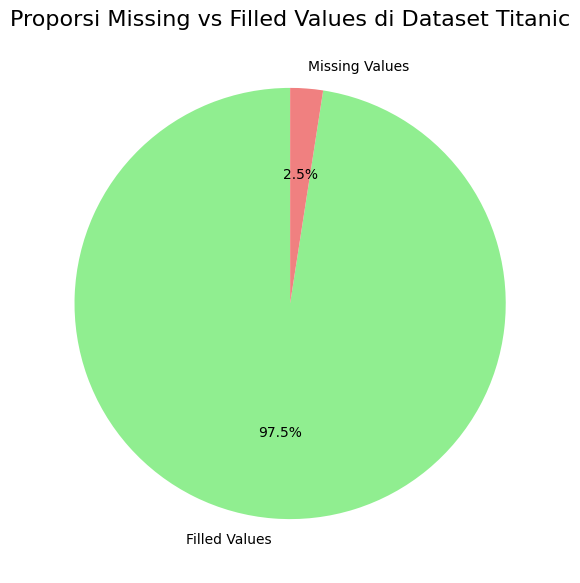

In [ ]:
# Menghitung total missing values dan filled values di dataset
total_values = df.size
missing_values_total = df.isnull().sum().sum()
filled_values_total = total_values - missing_values_total

# Visualisasi Pie Chart
plt.figure(figsize=(7, 7))
plt.pie([filled_values_total, missing_values_total], labels=['Filled Values', 'Missing Values'],
        colors=['lightgreen', 'lightcoral'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Missing vs Filled Values di Dataset Titanic', fontsize=16)
plt.show()

In [ ]:
# percentage version
total_rows = len(data)

# Calculate and display the percentage of missing values in each column one by one
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


**🔍 Handling Missing Values**

The dataset contains missing values only in the age column, with 49 missing entries (9.82%). Since the missing rate is below 20%, we handle them as follows:

- Numerical column (age) → imputed using the median.
- Categorical columns → no missing values were found. For example, sex and survived are complete, so no imputation is needed for categorical data.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    int64  
 3   age       450 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.5+ KB


In [ ]:
data['age'].dtype

dtype('float64')

In [ ]:
data['age'].mode()[0]

np.float64(24.0)

In [ ]:
data['age'].median()

35.0

In [ ]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].median())


To handle missing values automatically based on their data type:

- Object/Category → fill with the mode
- Numeric → fill with the median

This way, the data becomes clean and ready for analysis.

In [ ]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    int64  
 3   age       499 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.5+ KB


Success removing NULL values!

# **Explatory Data Analysis - EDA**

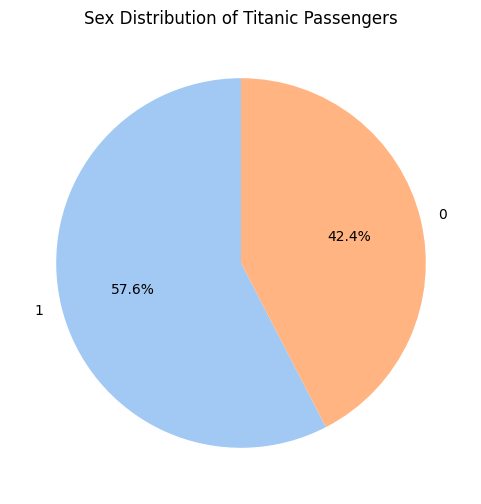

In [ ]:
# Pie chart for the distribution of Sex with automatic colors
sex_counts = df['sex'].value_counts()
colors = sns.color_palette('pastel')[:len(sex_counts)]

plt.figure(figsize=(6, 6))
sex_counts.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sex Distribution of Titanic Passengers')
plt.ylabel('')  # Remove y label for a cleaner look
plt.show()

**Sex Distribution of Titanic Passengers**

The pie chart above illustrates the distribution of sex among the passengers aboard the Titanic. In this dataset:

- The value **0 represents female** passengers  
- The value **1 represents male** passengers  

From the chart, we can see that:

- **57.6%** of the passengers were **male (1)**
- **42.4%** of the passengers were **female (0)**

This indicates that there were more male passengers than female passengers on board the Titanic.


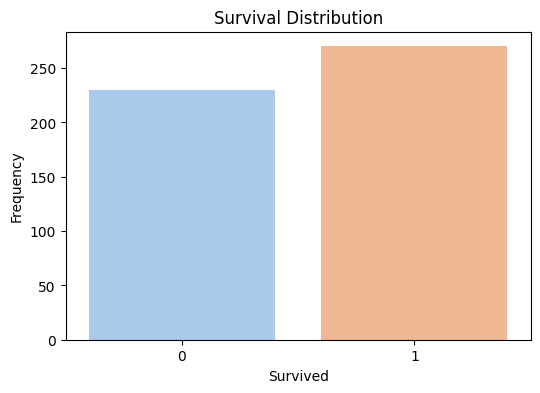

In [ ]:
# Histogram for the distribution of Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='survived', data=df, palette='pastel', legend=False)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

**Survival Distribution of Titanic Passengers**

The bar chart above illustrates the survival distribution among passengers aboard the Titanic. In this dataset:

- The value **0 represents passengers who did not survive**  
- The value **1 represents passengers who survived**

From the chart, we can observe that:

- A slightly higher number of passengers **survived (1)** compared to those who **did not survive (0)**
- There were approximately **270 survivors** and around **230 non-survivors**

This indicates that while the number of survivors was slightly greater, a significant portion of passengers unfortunately did not survive the tragedy.

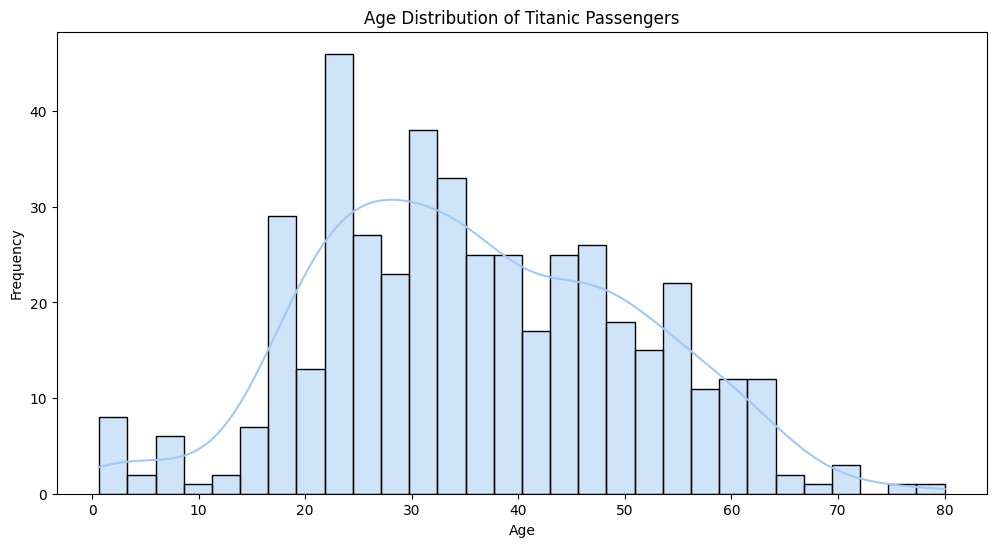

In [ ]:
# Histogram for the distribution of Age
plt.figure(figsize=(12, 6))
color = sns.color_palette('pastel')[0]  # Take the first color from the pastel palette
sns.histplot(df['age'].dropna(), kde=True, bins=30, color=color)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Age Distribution of Titanic Passengers**

The bar chart on the side shows the age distribution of the passengers aboard the Titanic. From the chart, we can conclude that:

- Most passengers were between **20 and 40 years old**, with the highest frequency around the age of **25**.
- There were also a number of very young passengers, even below the age of **10**, although they were fewer than those in the young adult age group.
- The frequency gradually decreases after the age of **40**, and only a small number of passengers were above **60 years old**.
- The distribution curve appears to be **right-skewed**, indicating that younger passengers were more common than older ones.

This distribution suggests that the majority of Titanic passengers were in their productive or young adult age.

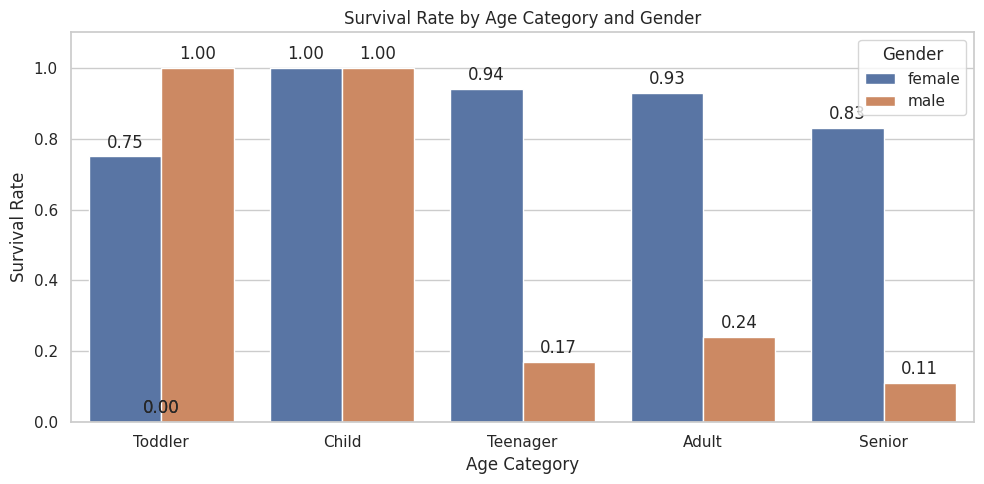

In [ ]:
# Survival Rate by Age Category and Gender
def plot_survival_by_age_and_gender(datatitanic):
    # Calculate survival rate per age category and gender
    survival_rate = datatitanic.groupby(['age_category', 'sex'], observed=True)['survived'].mean().reset_index()
    survival_rate['survived'] = survival_rate['survived'].round(2)

    # Set seaborn style
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    # Create barplot
    barplot = sns.barplot(data=survival_rate, x='age_category', y='survived', hue='sex')

    # Add value labels on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10),
                         textcoords='offset points')

    plt.title("Survival Rate by Age Category and Gender")
    plt.ylabel("Survival Rate")
    plt.xlabel("Age Category")
    plt.legend(title="Gender")
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

# Call the function after defining it:
plot_survival_by_age_and_gender(datatitanic)


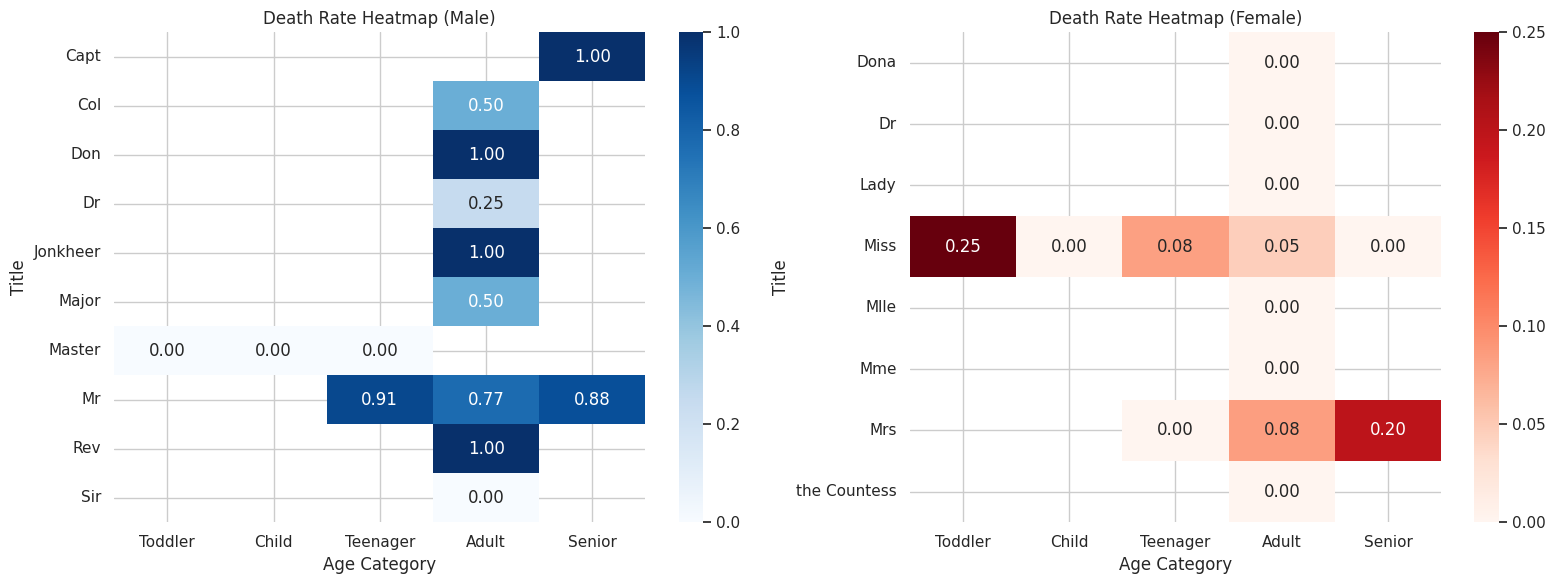

In [ ]:
# Heatmap of Death Rate by Title and Age Category
def plot_death_heatmap_by_title_and_age(datatitanic):
    # Create a 'died' column (1 if died, 0 if survived)
    datatitanic['died'] = 1 - datatitanic['survived']

    # Split the data by gender
    male_data = datatitanic[datatitanic['sex'] == 'male']
    female_data = datatitanic[datatitanic['sex'] == 'female']

    # Pivot tables with observed=True to avoid FutureWarning
    male_pivot = male_data.pivot_table(
        index='title',
        columns='age_category',
        values='died',
        aggfunc='mean',
        observed=True
    )
    female_pivot = female_data.pivot_table(
        index='title',
        columns='age_category',
        values='died',
        aggfunc='mean',
        observed=True
    )

    # Create heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.heatmap(male_pivot, annot=True, cmap='Blues', fmt=".2f", ax=axes[0])
    axes[0].set_title("Death Rate Heatmap (Male)")
    axes[0].set_xlabel("Age Category")
    axes[0].set_ylabel("Title")

    sns.heatmap(female_pivot, annot=True, cmap='Reds', fmt=".2f", ax=axes[1])
    axes[1].set_title("Death Rate Heatmap (Female)")
    axes[1].set_xlabel("Age Category")
    axes[1].set_ylabel("Title")

    plt.tight_layout()
    plt.show()
plot_death_heatmap_by_title_and_age(datatitanic)

# Analysis of Categorical Relationships
Analyze the relationships between categorical features to determine if they have an impact on the likelihood of passengers surviving.

**Analysis of Sex and Survival**

This chart shows the difference in survival chances between males and females.

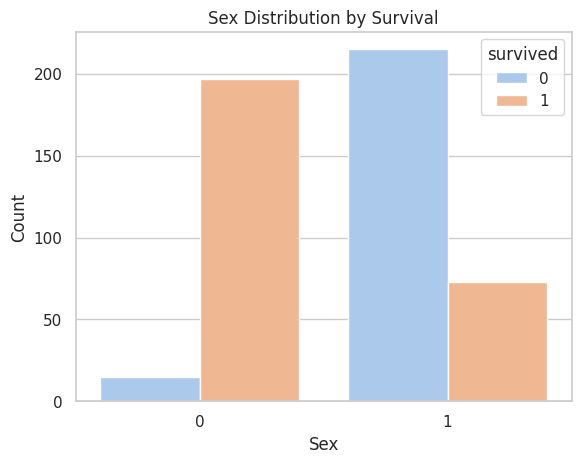

In [ ]:
# Count plot for sex distribution by survival status
sns.countplot(data=df, x='sex', hue='survived', palette='pastel', legend=True, hue_order=[0, 1])
plt.title('Sex Distribution by Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The chart illustrates the number of males and females based on their survival status.

- **0 represents females**, while **1 represents males**.  
- **Blue indicates passengers who did not survive**, and **orange represents those who survived**.

Most **females survived**, as shown by the much taller orange bar compared to the blue bar in the female category.

In contrast, a larger number of **males did not survive**, which is evident from the significantly taller blue bar compared to the orange one in the male category.

The percentage of people who survived is higher for females than for males.  
* Survived = 1  
* Did not survive = 0

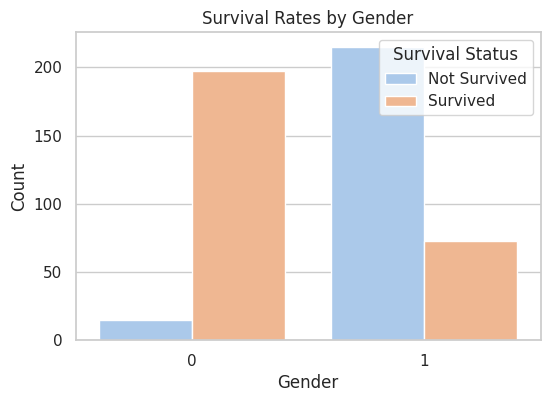

In [ ]:
# Count plot for categorical feature 'sex' with pastel color palette
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='survived', palette='pastel', legend=True, hue_order=[0, 1])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Rename legend labels
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.show()

# Analisis Age dan Survived

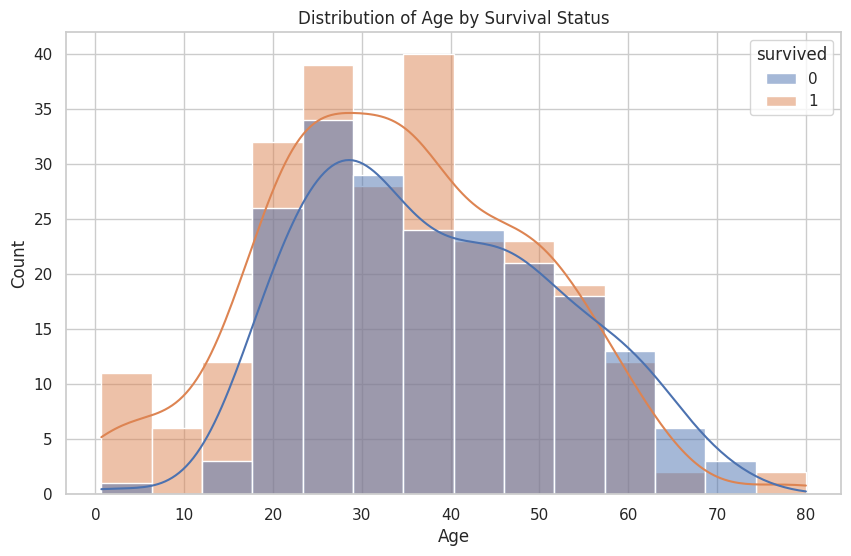

In [ ]:
# Drop NaN dan inf dari kolom 'age' sebelum visualisasi
df_filtered = df[np.isfinite(df['age']) & df['age'].notnull()]

# Histogram plot of age distribution by survival status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='age', hue='survived', kde=True)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

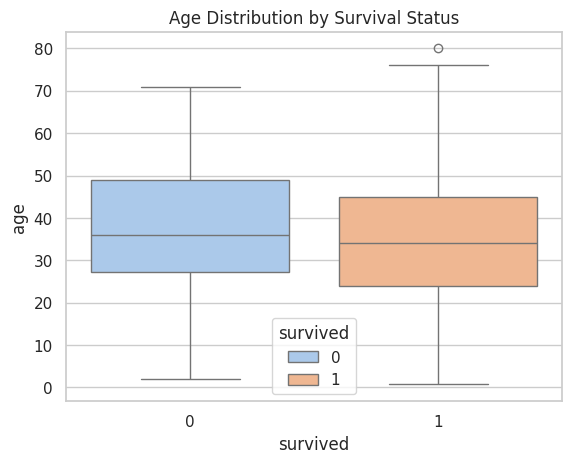

In [ ]:
sns.boxplot(data=df, x='survived', y='age', hue='survived', palette='pastel')
plt.title('Age Distribution by Survival Status')
plt.show()

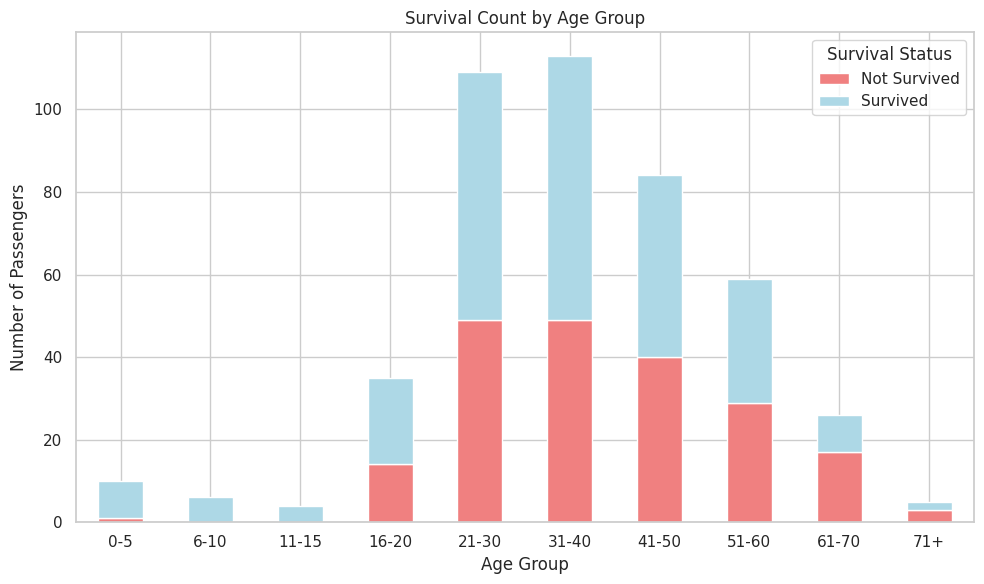

In [ ]:
# Define age bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Categorize ages into defined age groups
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count survivors and non-survivors in each age group
age_survival = df.groupby(['AgeGroup', 'survived'], observed=True).size().unstack(fill_value=0)

# Plot the stacked bar chart
age_survival.plot(kind='bar', stacked=True, figsize=(10, 6),
                  color=['lightcoral', 'lightblue'])  # Use color instead of palette
plt.title("Survival Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

**📊 Insight: Survival Count by Age Group**

Based on the chart above, we can derive several key insights regarding passenger survival rates across different age groups:

1. **Children (0–10 years old)** appear to have a relatively high survival rate. Both the 0–5 and 6–10 age groups show more survivors than non-survivors. This may suggest that children were given priority during evacuation procedures, such as being allocated seats in lifeboats.

2. **Teenagers and young adults (16–30 years old)** make up a significant portion of the passengers, but their survival rates tend to be more balanced between those who survived and those who did not. This could indicate that this age group was not a primary focus during rescue efforts.

3. **Middle-aged adults (31–60 years old)** also comprise a large part of the passenger list, with especially high survival counts in the 31–40 age group. This might be attributed to their greater physical strength and endurance compared to other age categories.

4. **Elderly passengers (61 years and above)** show a decline both in number and in survival rates. The 71+ age group, in particular, has very few passengers and an even smaller number of survivors. This may be due to physical limitations or lower evacuation priority.

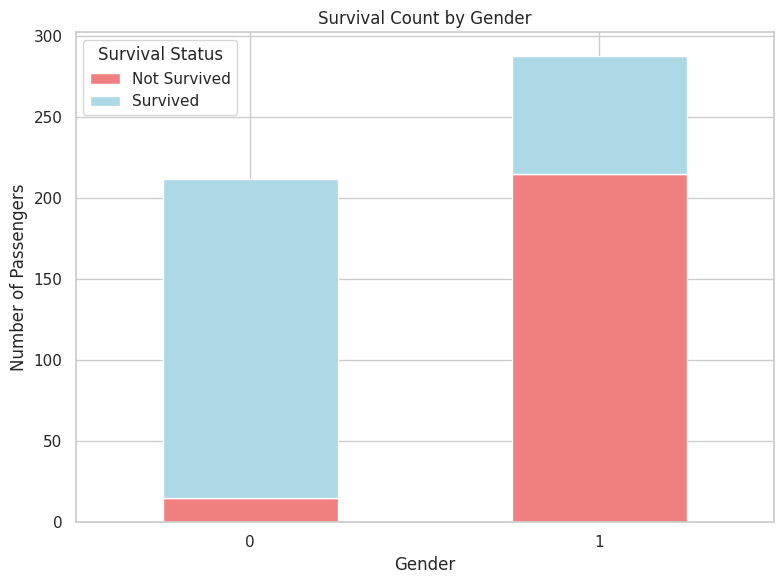

In [ ]:
# Grouping survival counts based on gender
sex_survival = df.groupby(['sex', 'survived'], observed=True).size().unstack(fill_value=0)

# Plotting stacked bar chart
sex_survival.plot(kind='bar', stacked=True, figsize=(8, 6),
                  color=['lightcoral', 'lightblue'])  # red for not survived, blue for survived
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

**📊 Insight: Survival Count by Gender**

From the bar chart above, we can draw several important insights regarding survival rates based on gender:

→ **Female passengers had a significantly higher survival rate.**
Compared to males. The number of female survivors greatly exceeds the number of non-survivors, indicating that women were likely given priority during the evacuation process, possibly due to the "women and children first" protocol.

→ **Male passengers, on the other hand, had a much lower chance of survival.**
The majority of male passengers did not survive, as shown by the large red segment on the male bar.

### **Correlation Matrix**

The matrix below shows the correlation between pairs of variables. Correlation coefficients range from -1 to 1, indicating the strength and direction of the linear relationship between two variables:

- **+1**: A perfect positive correlation, meaning that as one variable increases, the other increases proportionally.  
- **0**: No linear correlation between the variables, suggesting that changes in one variable do not predict changes in the other.  
- **-1**: A perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.

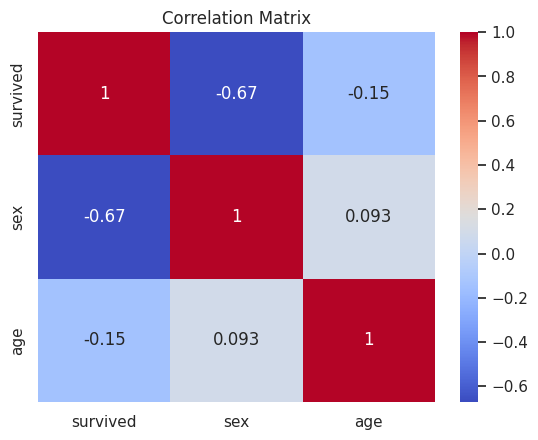

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix above, there is a **strong negative correlation** between **sex** and **survival**, with a coefficient of **-0.67**. This suggests that **gender had a significant impact on survival chances**. Assuming the variable `sex` is encoded as 0 = female and 1 = male, this negative correlation indicates that **females were more likely to survive**.

There is also a **very weak negative correlation** between **age** and **survival**, with a coefficient of **-0.15**. This means that **older passengers were slightly less likely to survive**, although the relationship is weak and likely not statistically significant.

Additionally, the value of **1** in the matrix represents a **perfect correlation of a variable with itself** — such as **`survived` with `survived`** or **`age` with `age`**. This is standard in any correlation matrix, as each variable is always perfectly correlated with itself.

# **Data Preprocessing**
This step is used to improve or clean the data.

Based on the missing values, there is one category that contains missing data, which is the **Age** column.

### Filling Missing Values in the Age Column with the Median

The missing values in the **Age** column are filled using the median, under the assumption that the true age values are unknown. The median is chosen because it is less affected by outliers or skewed data distributions.

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

### Check the Results After Preprocessing

In [ ]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,0
AgeGroup,49


# **Feature Engineering**

### Converting Categorical Features to Numerical Values

Machine learning models cannot work directly with textual data, so we need to convert the categorical feature **"Sex"** into a numerical format.

**Label Encoding** is applied to transform the categorical data into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#membuat instance LabelEncoder
le = LabelEncoder()

#mengubah kolom 'Sex' menjadi numerik
df['sex'] = le.fit_transform(df['sex'])

In [ ]:
#Menampilkan 5 baris pertama untuk melihat perubahan
df.head()

,survived,name,sex,age,AgeGroup
0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,21-30
1,1,"Allison, Master. Hudson Trevor",1,0.9167,0-5
2,0,"Allison, Miss. Helen Loraine",0,2.0000,0-5
3,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,31-40
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,21-30


### Feature Selection
Feature selection is the process of choosing the most relevant features to be used in the model in order to improve its performance.

In [ ]:
# Select relevant features
features = ['sex', 'age']
X = df[features]  # Feature dataset
y = df['survived']  # Target column

In [ ]:
X

,sex,age
0,0,29.0000
1,1,0.9167
2,0,2.0000
3,1,30.0000
4,0,25.0000
5,1,48.0000
6,0,63.0000
7,1,39.0000
8,0,53.0000
9,1,71.0000


In [ ]:
y

,survived
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


### Feature Scaling  
**Feature scaling** is the process of transforming numerical features to ensure that all features contribute equally to the model.

Why is only the **Age** feature scaled?  
This is because the values in the **Age** feature vary widely (e.g., from 0 to 80 years old), which can disproportionately influence the model. Other features are categorical and only require encoding, not scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler instance
scaler = StandardScaler()

# Scale the numerical feature safely using .loc
X.loc[:, 'age'] = scaler.fit_transform(X[['age']])

# Display the scaled features
X.head()


,sex,age
0,0,-0.487307
1,1,-2.491633
2,0,-2.414317
3,1,-0.415937
4,0,-0.772790


### 🧠 **Interpretation of StandardScaler Results (Feature: `age`)**

After applying StandardScaler to the `age` feature, the values are no longer in their original form (e.g., 22, 35, etc.) but are now expressed as **standard scores (z-scores)**. These values indicate how far each age is from the **mean age**, measured in units of standard deviation.

- The first row has an `age` value of approximately **-0.487**, which means this passenger is about **0.49 standard deviations younger than the average**.
- The second and third rows have values around **-2.49** and **-2.41**, indicating that these passengers are **significantly younger than the average**.
- Conversely, a **positive value** would indicate an age that is **above the average**.

### Why is this important?

This transformation is essential before applying machine learning algorithms such as **K-Nearest Neighbors (KNN)**, **Support Vector Machines (SVM)**, or **Logistic Regression**, as these models are sensitive to the scale of input features. Standardizing ensures that all features are on a comparable scale, leading to **more accurate and reliable predictions**.

# Splitting Data
Splitting a dataset into a training set and a testing set.

In [ ]:
# Mengimpor library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Data

In [ ]:
X_train

,sex,age
249,1,-1.629239
433,1,1.867927
19,1,0.012288
322,0,0.012288
332,1,-0.915532
56,1,0.012288
301,1,0.797366
229,0,-1.343756
331,1,-1.272386
132,1,-0.844161


In [ ]:
y_train

,survived
249,1
433,1
19,0
322,1
332,0
56,1
301,0
229,1
331,0
132,0


### Test data

In [ ]:
X_test

,sex,age
361,1,-0.701420
73,0,-0.986903
374,0,-0.558678
155,0,1.154219
104,0,1.296961
394,1,-0.772790
377,1,-0.844161
124,0,0.868736
68,1,0.654624
450,0,1.296961


In [ ]:
y_test

,survived
361,1
73,1
374,1
155,1
104,1
394,0
377,1
124,1
68,1
450,1


# Modeling

# Random Forest
Building a classification model using Random Forest

In [ ]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier

# Create and Train Random Forest Model

In [ ]:
# Create Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- **n_estimators** determines the number of trees to be created in the Random Forest. When we set n_estimators=100, it means we will create 100 different decision trees. Each tree will make a prediction, and the final result will be a combination of all those tree predictions.
  
- **random_state** is a number used to set the "random seed." Using random_state ensures that the results we obtain from running the model are always consistent. For example, every time we run the code with random_state=42, the results will be the same.

# Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)

# Random Forest Model Evaluation
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-Score.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Predict test data using the built Random Forest model

# Create a Comparison DataFrame

In [ ]:
# Comparison of Actual vs Predicted
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
361,1,0
73,1,1
374,1,1
155,1,1
104,1,1
394,0,0
377,1,0
124,1,1
68,1,1
450,1,1


* Actual: The true value (correct label) for each sample
* Predicted: The value predicted by the model

# Create Confusion Matrix
Calculate and print the confusion matrix that shows how the model's predictions compare with the actual labels.

In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37  7]
 [10 46]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.87      0.82      0.84        56

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



* **True Negative (TN)**: 37 = The model predicts not survived (0) and is correct (0).
* **False Positives (FP)**: 7 = The model predicts survived (1), but the actual outcome is not survived (0).
* **False Negatives (FN)**: 10 = The model predicts not survived (0), but the actual outcome is survived (1).
* **True Positives (TP)**: 46 = The model predicts survived (1) and is correct (1).

Confusion Matrix Visualization

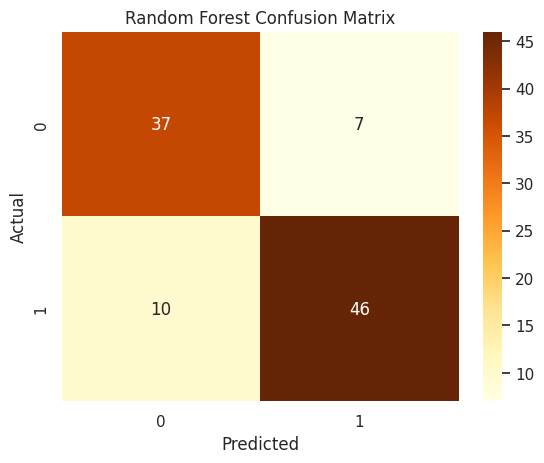

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculating the Accuracy of Predictions

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


# Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.87      0.82      0.84        56

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



**Precision**: The proportion of correct positive predictions out of all positive predictions.  
* Class 0: 79% of negative predictions are correct.  
* Class 1: 87% of positive predictions are correct.

**Recall**: The proportion of correct predictions out of all actual positives.  
* Class 0: 84% of actual negatives are correctly predicted as negative.  
* Class 1: 82% of actual positives are correctly predicted as positive.

**F1-Score**: The harmonic mean of precision and recall, providing an overall measure of the model’s performance. A higher value indicates a better model.

**Support**: The number of actual instances of each class in the dataset.  
* Class 0: 44 instances  
* Class 1: 56 instances

**Macro Average**: The average of precision, recall, and F1-score without considering the number of instances in each class.

**Weighted Average**: The average of precision, recall, and F1-score, taking into account the number of instances in each class.

# K-Nearest Neighbors (KNN)

In [ ]:
# Import KNN Classifier dari sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Inisialisasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)  # Kita mulai dengan k=5, bisa di-tune nanti

# Melatih model KNN dengan data latih
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prediksi dengan data uji
y_pred_knn = model_knn.predict(X_test)

In [ ]:
# Evaluasi hasil
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.84


In [ ]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Confusion Matrix:
[[40  4]
 [12 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.92      0.79      0.85        56

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



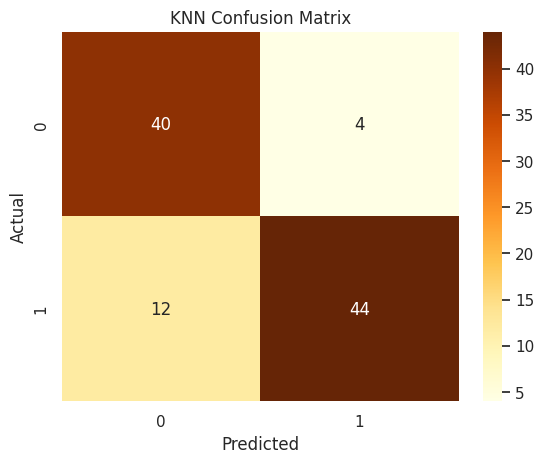

In [ ]:
# Visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Support Vector Machine (SVM)

In [ ]:
# Import SVC dari sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Inisialisasi model SVM
model_svm = SVC(kernel='linear', random_state=42)  # Kita mulai dengan kernel linear

# Melatih model SVM dengan data latih
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Prediksi dengan data uji
y_pred_svm = model_svm.predict(X_test)

In [ ]:
# Evaluasi hasil
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.86


In [ ]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Confusion Matrix:
[[42  2]
 [12 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.96      0.79      0.86        56

    accuracy                           0.86       100
   macro avg       0.87      0.87      0.86       100
weighted avg       0.88      0.86      0.86       100



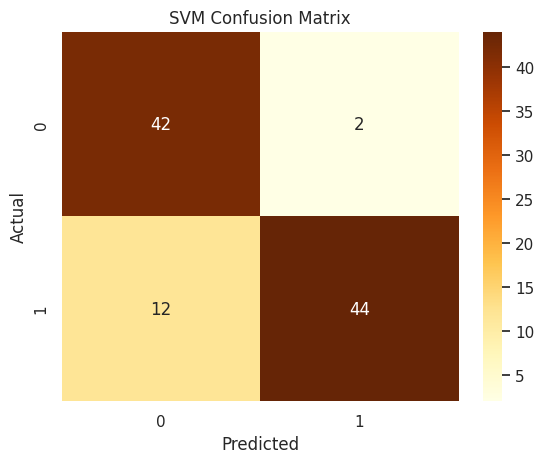

In [ ]:
# Visualisasi confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Gradient Boosting

In [ ]:
# Import library GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Inisialisasi model Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)

# Melatih model Gradient Boosting dengan data latih
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Prediksi dengan data uji
y_pred_gb = model_gb.predict(X_test)

In [ ]:
# Evaluasi hasil
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

Gradient Boosting Accuracy: 0.85


In [ ]:
# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Confusion Matrix:
[[40  4]
 [11 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        44
           1       0.92      0.80      0.86        56

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.86      0.85      0.85       100



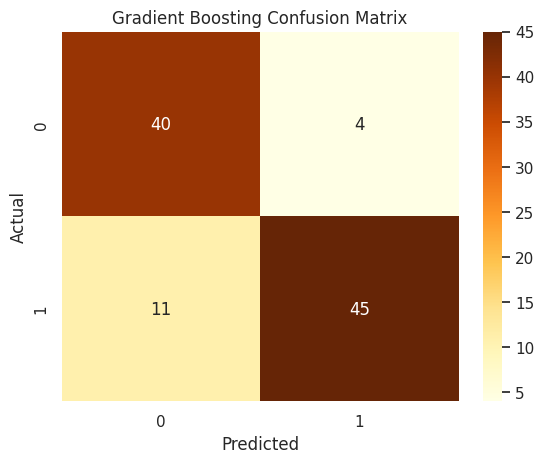

In [ ]:
# Visualisasi confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

### NOTE

## Feature importances (khusus random forest)

### feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

## Thank you :)